In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-loans/lending_club_loan_two.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Information and Importing Data: 

In [3]:
df=pd.read_csv("../input/lending-club-loans/lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


----
-----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# 2. Explarotory Data Analysis:

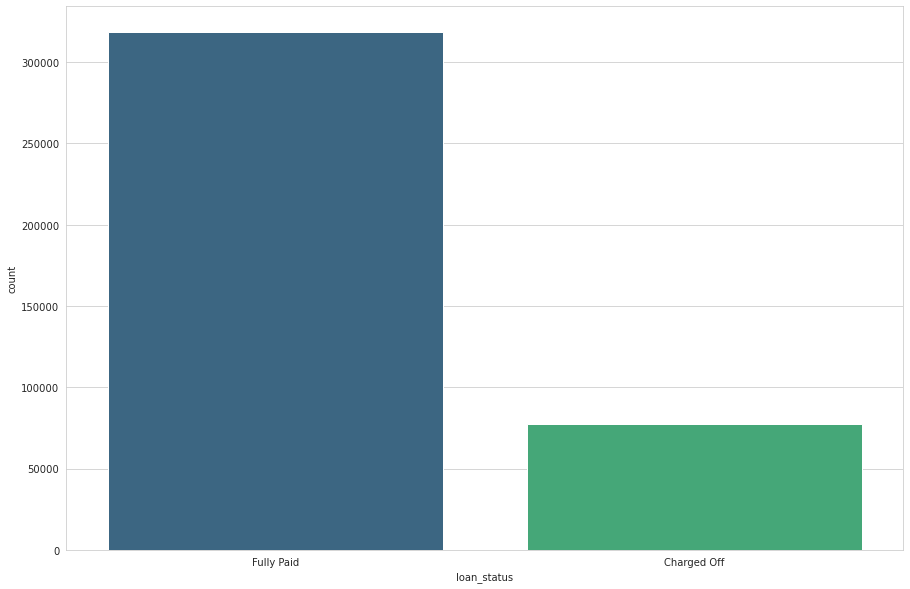

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status",data=df,palette="viridis")
#This is the target column our ML algorithm will base on its predictions

(array([2.2670e+03, 5.6280e+03, 5.4990e+03, 1.1040e+04, 9.0380e+03,
        1.9163e+04, 1.9787e+04, 7.9990e+03, 1.5863e+04, 1.7886e+04,
        1.3435e+04, 9.0640e+03, 3.3680e+04, 1.0295e+04, 2.5228e+04,
        8.2190e+03, 4.8240e+03, 1.1680e+04, 2.3176e+04, 1.3024e+04,
        6.5570e+03, 3.7200e+03, 1.2104e+04, 4.9210e+03, 2.1937e+04,
        7.4400e+03, 2.4210e+03, 4.2610e+03, 2.7940e+03, 1.0325e+04,
        2.1090e+03, 1.0351e+04, 2.1240e+03, 1.5810e+03, 6.5600e+03,
        1.0060e+03, 1.2990e+03, 7.5930e+03, 8.9500e+02, 1.5990e+03,
        7.8400e+02, 1.0770e+03, 5.8100e+02, 1.4938e+04, 4.7000e+01,
        8.0000e+00, 7.0000e+00, 8.0000e+00, 4.0000e+00, 1.8400e+02]),
 array([  500.,  1290.,  2080.,  2870.,  3660.,  4450.,  5240.,  6030.,
         6820.,  7610.,  8400.,  9190.,  9980., 10770., 11560., 12350.,
        13140., 13930., 14720., 15510., 16300., 17090., 17880., 18670.,
        19460., 20250., 21040., 21830., 22620., 23410., 24200., 24990.,
        25780., 26570., 27360.

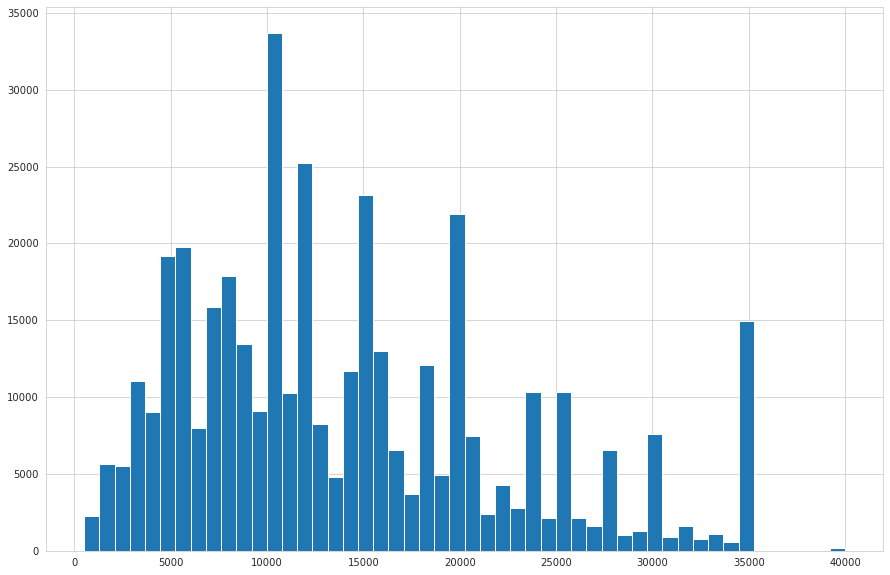

In [5]:
plt.figure(figsize=(15,10))
plt.hist(df["loan_amnt"],bins=50)

In [6]:
df.corr()
# here we explore correlation between the continuous feature variables

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


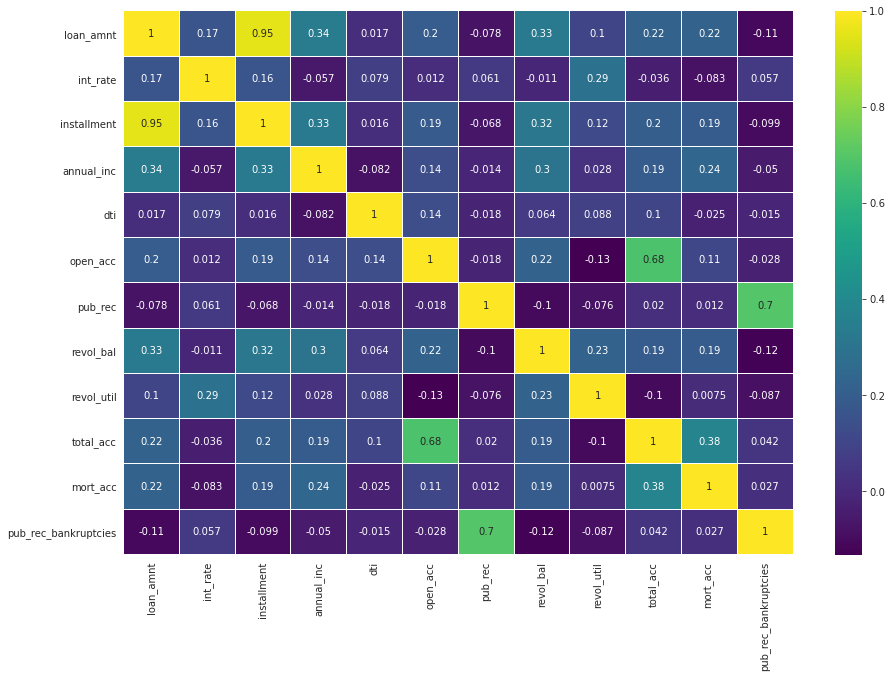

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidths=0.1)
#Here we visualize these correlations

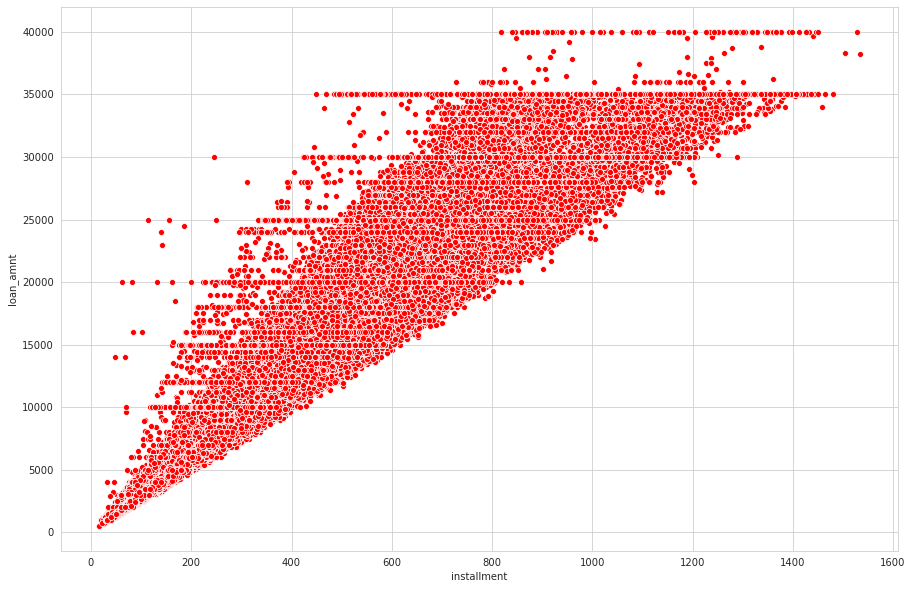

In [8]:
#We notice the perfect correlation between the "installment" and loan amount features
plt.figure(figsize=(15,10))
sns.scatterplot(x="installment",y="loan_amnt", data=df, color="red")

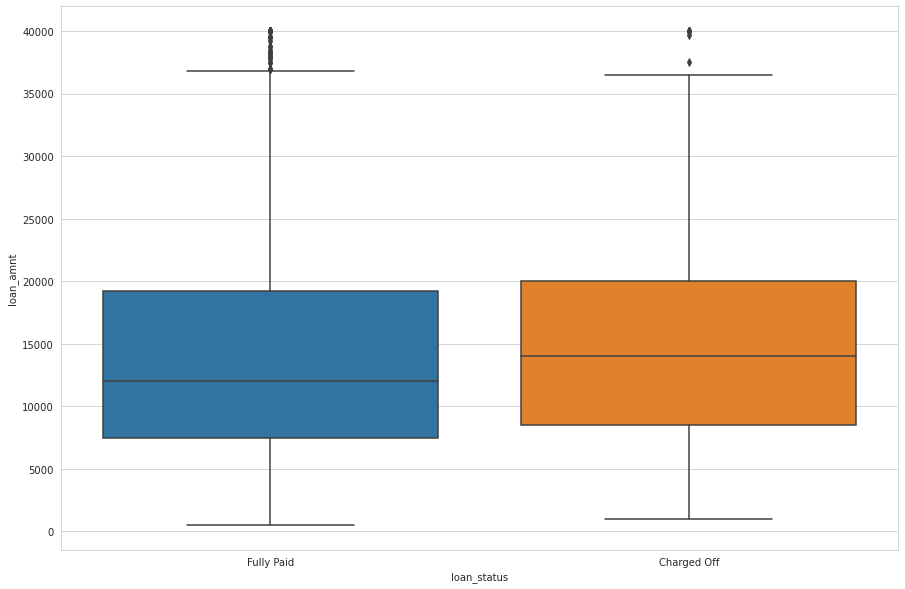

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x="loan_status", y="loan_amnt",data=df)
# Here we create a boxplot showing the relationship between the loan status and the Loan Amount

**Hello**

In [10]:
# from the box plot above we can see any difference between fully paind and charged off loans with respect to loan amoun
#here we want to get more details 
df.groupby("loan_status")["loan_amnt"].describe()
#The loan amount mean of fully paid loans are clearly fewer than charged off loans

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [11]:
df["grade"].unique()
#There are 7 different unique grades

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [12]:
df["sub_grade"].unique()
#There are 35 different sub grades


array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

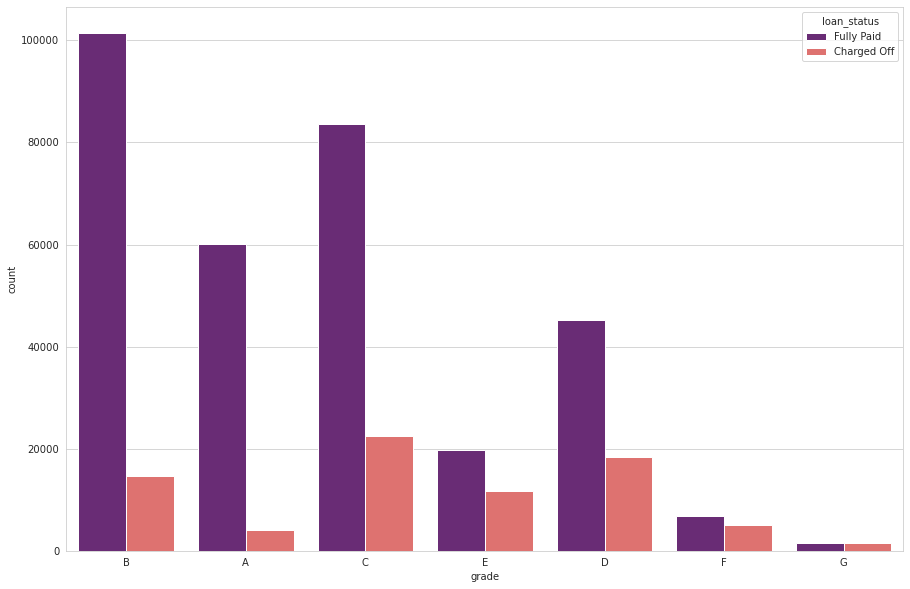

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x="grade", data=df, hue="loan_status",palette="magma")
# Here we creats a countplot per grade with the hue to the loan_status label

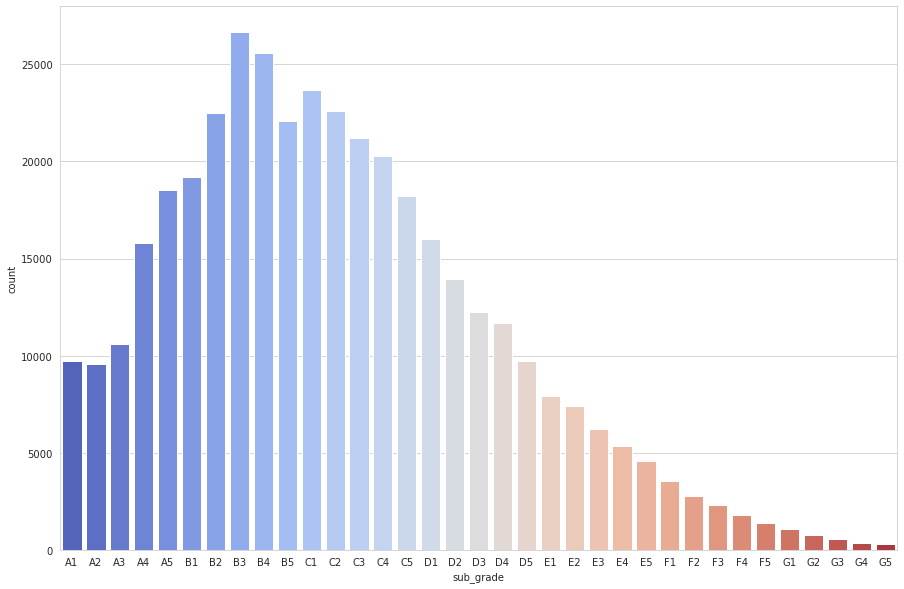

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x="sub_grade",data=df,palette="coolwarm",order=sorted(df["sub_grade"].unique()))
#Here we explore both all loans made per subgrade as well being separated based on the loan_status


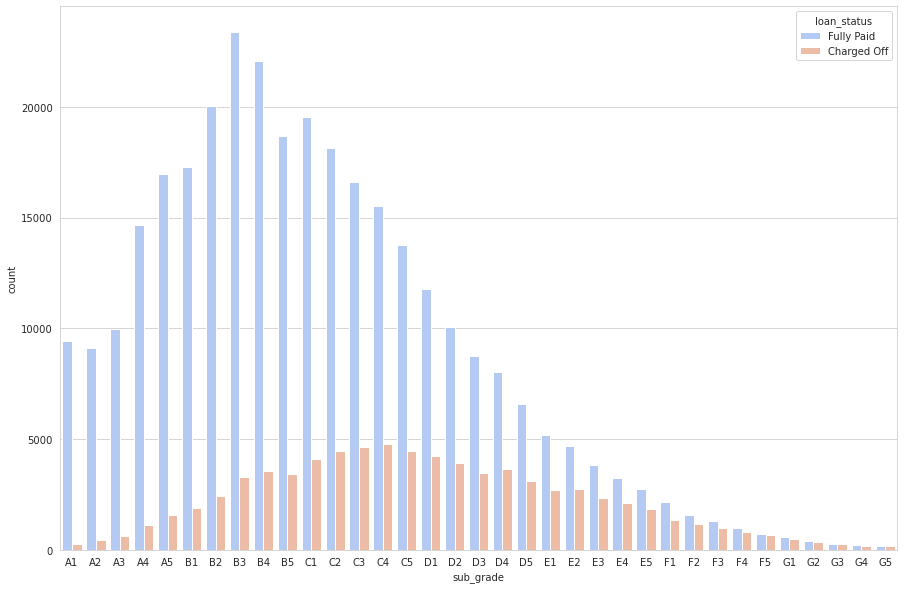

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x="sub_grade",data=df,palette="coolwarm",hue="loan_status",order=sorted(df["sub_grade"].unique()))
#We can clearly notice that higher grades tend to pay back more than lower grades

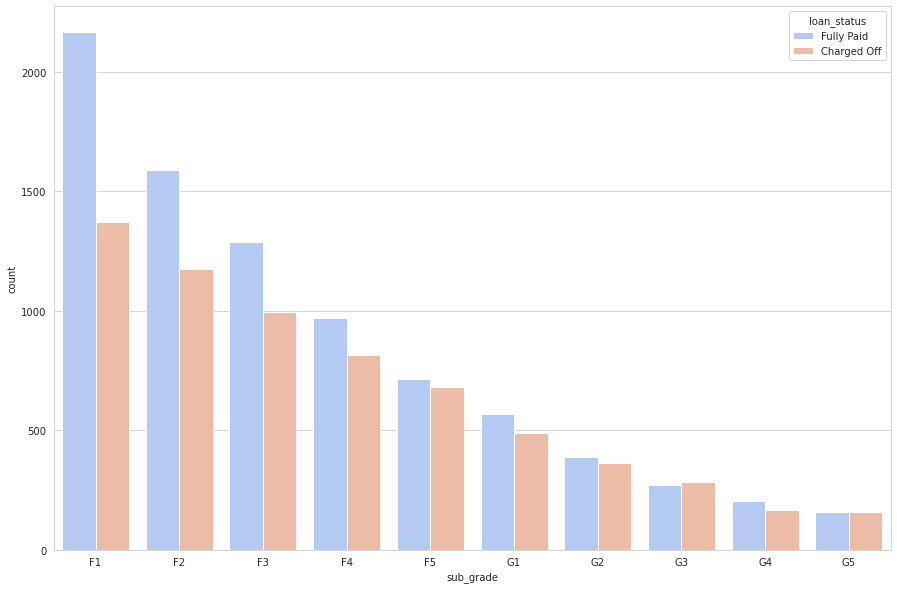

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="sub_grade",data=df[(df['grade']=='G') | (df['grade']=='F')],palette="coolwarm",hue="loan_status",order=sorted(df[(df['grade']=='G') | (df['grade']=='F')]["sub_grade"].unique()))
# Here we see only the grades F and G

In [17]:
df["loan_repaid"]=df["loan_status"].map({"Fully Paid":1, "Charged Off":0})
df[["loan_repaid","loan_status"]]
# Here create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


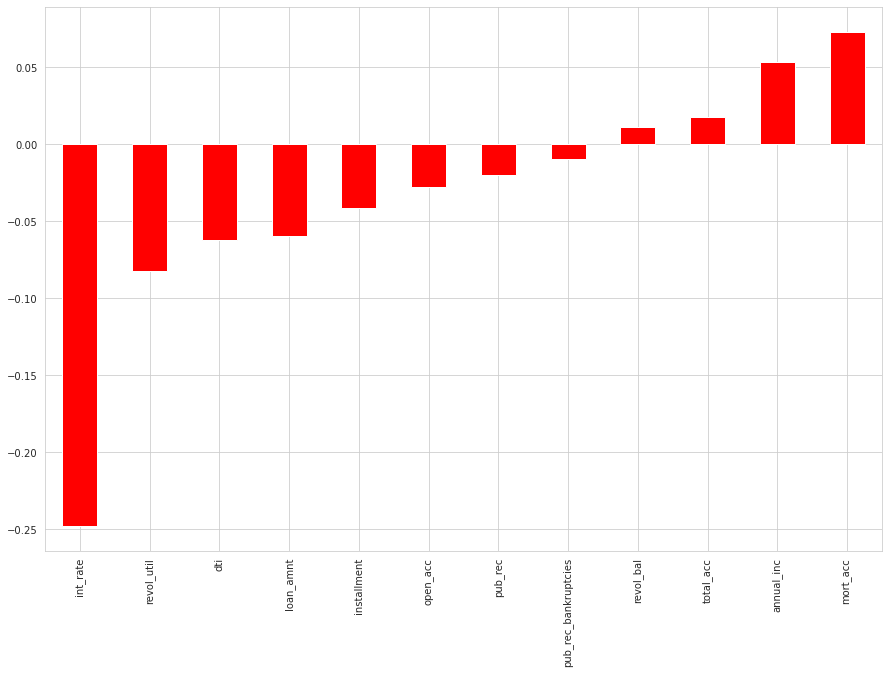

In [18]:
plt.figure(figsize=(15,10))
df.corr()["loan_repaid"][:-1].sort_values().plot(kind="bar",color="red")
#Here we create a bar plot showing the correlation of the numeric features to the new loan_repaid column

# 3. Data Preprocesing:

In [19]:
df.isnull().sum()
#here we want to find out the columns with missing values
#There 6 columns with missing values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [20]:
100*df.isnull().sum()/len(df)
#Here we see the percentages of missing values per column

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

The data with highest misisng rate pertages are emp_title(represents job title of the borrower), emp_length(employment length in years), and mort_acc(Number of mortgage accounts).

In [21]:
df["emp_title"].nunique()
#we see that there are 173105 employment titles

173105

In [22]:
df["emp_title"].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
pag west audi stevens creek           1
california amforge corp               1
Hancock County Sheriff's Office       1
Scitor Corporation                    1
VHV                                   1
Name: emp_title, Length: 173105, dtype: int64

In [23]:
df.drop("emp_title",axis=1, inplace=True)
df.columns
# We will drop this column because there are too many unique job titles to try to convert this to a dummy variable feature

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [24]:
df["emp_length"].head()

0    10+ years
1      4 years
2     < 1 year
3      6 years
4      9 years
Name: emp_length, dtype: object

In [25]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

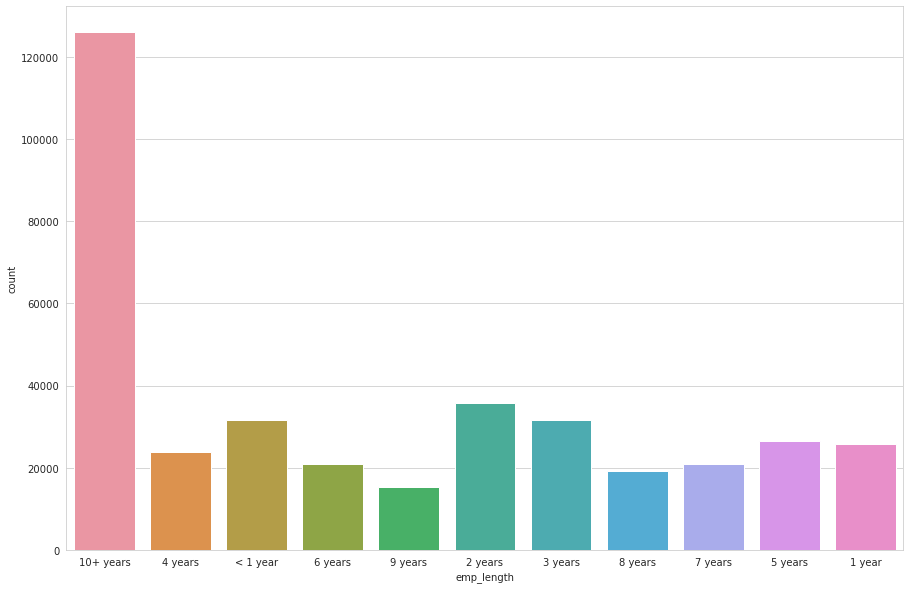

In [26]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.countplot(x="emp_length",data=df)

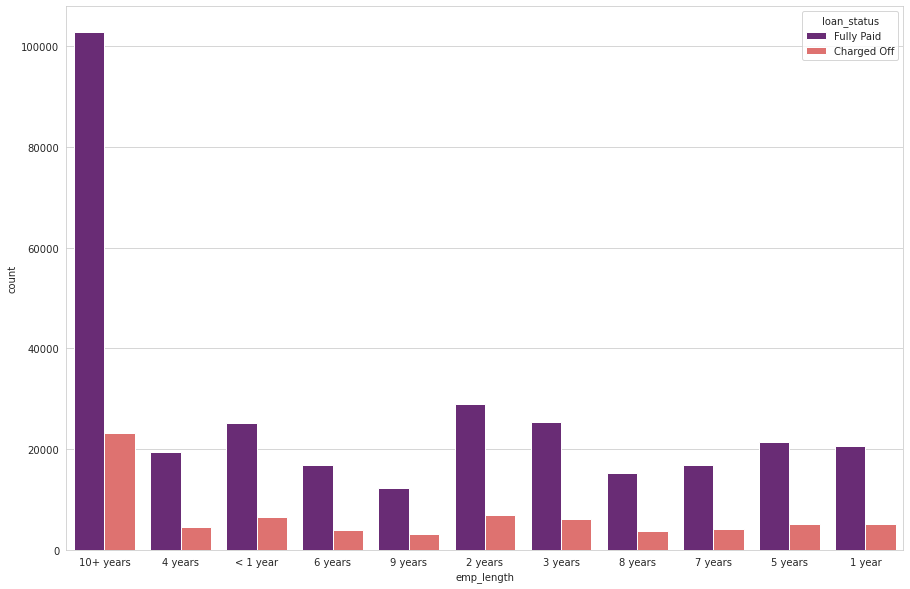

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(x="emp_length", data=df, hue="loan_status",palette="magma")
#From the plot we can not a distinctive difference between employment length and loan status

In [28]:
df[df["loan_status"]=="Fully Paid"].groupby("emp_length").count()["loan_status"]
#Here we get number of person who has the loan status fully paid according to employment length

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [29]:
df.groupby("emp_length").count()["loan_status"]
#Here we get number of person  according to employment length

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_status, dtype: int64

In [30]:
df[df["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"]
#Here we get number of person who has the loan status charged of according to employment length

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

We need percentage in order to evaluate imporance of this column

In [31]:
(df[df["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"])/(df.groupby("emp_length").count()["loan_status"])

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

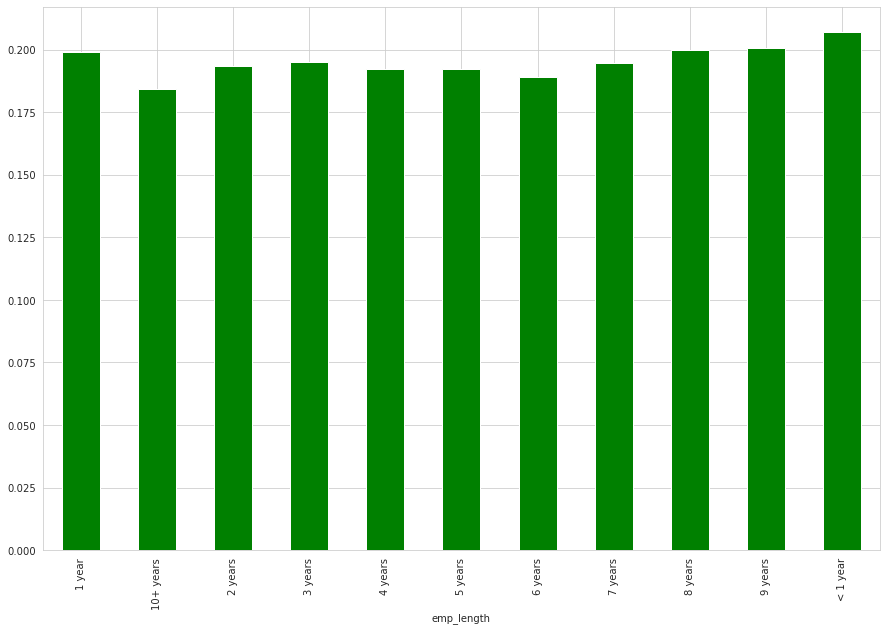

In [32]:
plt.figure(figsize=(15,10))
((df[df["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"])/(df.groupby("emp_length").count()["loan_status"])).plot(kind="bar",color="green")
# here we understand that the length of employment foes not make any difference, we can just drop this column

In [33]:
df.drop("emp_length",axis=1,inplace=True)
df.isnull().sum()
#Now we have just 4 columns with missing values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
df["title"].nunique()
#There are 48817 separate titles

48817

In [35]:
df["title"].head(20)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
15             Major purchase
16         Debt consolidation
17         Debt consolidation
18         Debt consolidation
19         Debt consolidation
Name: title, dtype: object

In [36]:
df["purpose"].nunique()
#There are 14 different unique data in purpose column

14

In [37]:
df["purpose"].unique()
# Here we see that the title column is simply a string subcategory/description of the purpose column

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [38]:
df.drop("title",axis=1,inplace=True)
#Therefore we will just drop this column because another column includes already the same features

In [39]:
df.corr()["mort_acc"].sort_values()
# we see thta the total_account feature correlates with the mort_acc

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [40]:
total_acc_average=df.groupby("total_acc").mean()["mort_acc"]
total_acc_average
#Here wegroup the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [41]:
#here we create a function in order to fill mort_account column with the mean of the corressponding total account column
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_average[total_acc]
    else:
        return mort_acc

In [42]:
df["mort_acc"]=df.apply(lambda x: fill_mort_acc(x["total_acc"],x["mort_acc"]),axis=1)

In [43]:
df.isnull().sum()
#No we have revol_util and the pub_rec_bankruptcies have missing data points, with 0.5% of the total data.

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [44]:
df.dropna(inplace=True)
#Therefore we drop all the rows with missing values

In [45]:
df.isnull().sum()
# Now we have not missing values in any column

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# 4.Dealing with Categorical Variables and Transforming them for the Algorithm:

In [46]:
df.select_dtypes("object").columns
#These are the columns with non numerical data

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [48]:
df["term"]=df["term"].apply(lambda term:int(term[:3]))
#Here we get the numerical data from the string form of the column term

In [49]:
df["term"].value_counts()
#Now this column is also  numerical

36    301247
60     93972
Name: term, dtype: int64

In [50]:
df.drop("grade",axis=1, inplace=True)
#This column is already represented in sub_grade columns, so we can just drop it

In [51]:
dummies=pd.get_dummies(df["sub_grade"], drop_first=True)
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df=pd.concat([df.drop("sub_grade", axis=1), dummies],axis=1)
df.head()
#here we concetenate the dummies with the original data withou sub_grade column

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.select_dtypes("object").columns
#There are 8 categorical columns left

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [54]:
df[['verification_status', 'application_type','initial_list_status','purpose']]

,verification_status,application_type,initial_list_status,purpose
0,Not Verified,INDIVIDUAL,w,vacation
1,Not Verified,INDIVIDUAL,f,debt_consolidation
2,Source Verified,INDIVIDUAL,f,credit_card
3,Not Verified,INDIVIDUAL,f,credit_card
4,Verified,INDIVIDUAL,f,credit_card
...,...,...,...,...
396025,Source Verified,INDIVIDUAL,w,debt_consolidation
396026,Source Verified,INDIVIDUAL,f,debt_consolidation
396027,Verified,INDIVIDUAL,f,debt_consolidation
396028,Verified,INDIVIDUAL,f,debt_consolidation


In [55]:
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df=pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1), dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [56]:
df.select_dtypes("object").columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [57]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [58]:
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")
df["home_ownership"].value_counts()
#we replace NONE and ANY with OTHER before we get dummies because there are very few people in these two status

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [59]:
dummies=pd.get_dummies(df["home_ownership"],drop_first=True)
df=pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)
df.select_dtypes("object")
#here we convert this column into dummy values

,issue_d,loan_status,earliest_cr_line,address
0,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...
396025,Oct-2015,Fully Paid,Nov-2004,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Feb-2015,Fully Paid,Feb-2006,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,Oct-2013,Fully Paid,Mar-1997,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,Aug-2012,Fully Paid,Nov-1990,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [60]:
df["address"] 
#we will get just numerical zip codes by creating a new column adn dropping address column

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [61]:
df["zip_code"]=df["address"].apply(lambda address: address[-5:])
df["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [62]:
df["loan_repaid"].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [63]:
dummies=pd.get_dummies(df["zip_code"],drop_first=True)
df=pd.concat([df.drop("zip_code",axis=1), dummies],axis=1)
df.select_dtypes("object").columns
# we also transform this colum into dummy values

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [64]:
df.drop("address",axis=1, inplace=True)
df.select_dtypes("object").columns
#we drop the address column 

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [65]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [66]:
df["earliest_cr_year"]=df["earliest_cr_line"].apply(lambda date: int(date[-4:]))
#here we get the year part of it
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   issue_d                              395219 non-null  object 
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   earliest_cr_line                     395219 non-null  object 
 9   open_acc                             395219 non-null  float64
 10  pub_rec                              395219 non-null  float64
 11  revol_bal    

In [67]:
df.drop("earliest_cr_line",axis=1,inplace=True)
df.select_dtypes("object")

,issue_d,loan_status
0,Jan-2015,Fully Paid
1,Jan-2015,Fully Paid
2,Jan-2015,Fully Paid
3,Nov-2014,Fully Paid
4,Apr-2013,Charged Off
...,...,...
396025,Oct-2015,Fully Paid
396026,Feb-2015,Fully Paid
396027,Oct-2013,Fully Paid
396028,Aug-2012,Fully Paid


In [68]:
#We can not know beforehand whether or not a loan will be issued beforehand,so this data is useless for the algorithm
df.drop(["issue_d","loan_status"],axis=1, inplace=True)
# Loan status is also numerically represented in another column, so we will just drop this column


In [69]:
df.select_dtypes("object").columns
#There is not any categorical column and the data is ready for machine learning algorithm

Index([], dtype='object')

# 5. Training the Deep Learning Algorithm 

In [70]:
df["loan_repaid"].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [71]:
X=df.drop("loan_repaid", axis=1).values
X

array([[1.000e+04, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        1.990e+03],
       [8.000e+03, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        2.004e+03],
       [1.560e+04, 3.600e+01, 1.049e+01, ..., 0.000e+00, 0.000e+00,
        2.007e+03],
       ...,
       [5.000e+03, 3.600e+01, 9.990e+00, ..., 0.000e+00, 0.000e+00,
        1.997e+03],
       [2.100e+04, 6.000e+01, 1.531e+01, ..., 0.000e+00, 0.000e+00,
        1.990e+03],
       [2.000e+03, 3.600e+01, 1.361e+01, ..., 0.000e+00, 0.000e+00,
        1.998e+03]])

In [72]:
X.shape # Features has 78 columns and 395219 rows and we transformed the into a numpy array for deep learning algorithm

(395219, 78)

In [73]:
y=df["loan_repaid"].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
y.shape

(395219,)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)


In [77]:
X_train.shape

(276653, 78)

In [78]:
X_test.shape

(118566, 78)

In [79]:
y_train.shape

(276653,)

In [80]:
y_test.shape

(118566,)

In [81]:
#Now we need to standartize the X features
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler=MinMaxScaler()

In [83]:
X_train=scaler.fit_transform(X_train) # here the scaler fit and transform the X training set
X_test=scaler.transform(X_test) #there is no need to fit again, so we just transform the X test set

In [84]:
X_train.shape

(276653, 78)

In [85]:
X_test

array([[0.87269255, 1.        , 0.50175302, ..., 0.        , 0.        ,
        0.86956522],
       [0.2616168 , 0.        , 0.21153097, ..., 0.        , 0.        ,
        0.72463768],
       [0.19541693, 0.        , 0.24191663, ..., 0.        , 0.        ,
        0.7826087 ],
       ...,
       [0.68173138, 0.        , 0.27931437, ..., 0.        , 0.        ,
        0.65217391],
       [0.23615532, 0.        , 0.48500195, ..., 0.        , 0.        ,
        0.88405797],
       [0.18523234, 0.        , 0.25983638, ..., 0.        , 0.        ,
        0.85507246]])

In [86]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [87]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

**The next step is to create the deep learning algorithm**

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [89]:
model=Sequential()
model.add(Dense(units=78, activation="relu"))
model.add(Dense(units=35, activation="relu"))
model.add(Dense(units=17,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
#In the last layer we will use sigmoid activation function because we will predict a binary class,not continuous


In [90]:
model.compile(loss="binary_crossentropy",optimizer="adam")
#This configures model for training, we select binary cross entropy as the loss function and adam as the optimizer

In [91]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2709 - val_loss: 0.2657
Epoch 2/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2610 - val_loss: 0.2621
Epoch 3/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2600 - val_loss: 0.2606
Epoch 4/25
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2594 - val_loss: 0.2617
Epoch 5/25
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2587 - val_loss: 0.2607
Epoch 6/25
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2583 - val_loss: 0.2605
Epoch 7/25
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2579 - val_loss: 0.2607
Epoch 8/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2574 - val_loss: 0.2599
Epoch 9/25
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2570 - val_loss: 0.2601
Epoch 10/25
8646/8646 [==============================] - 12s 1ms/step - l

# 6. Evaluation of the Model's Performance:

In [92]:
pd.DataFrame(model.history.history) #here we create a data fram that shows the values in our model and correspoding real values


,loss,val_loss
0,0.270931,0.265727
1,0.260978,0.262116
2,0.260017,0.260613
3,0.259367,0.261673
4,0.258737,0.260690
5,0.258281,0.260487
6,0.257885,0.260674
7,0.257437,0.259881
8,0.257030,0.260091
9,0.256549,0.260296


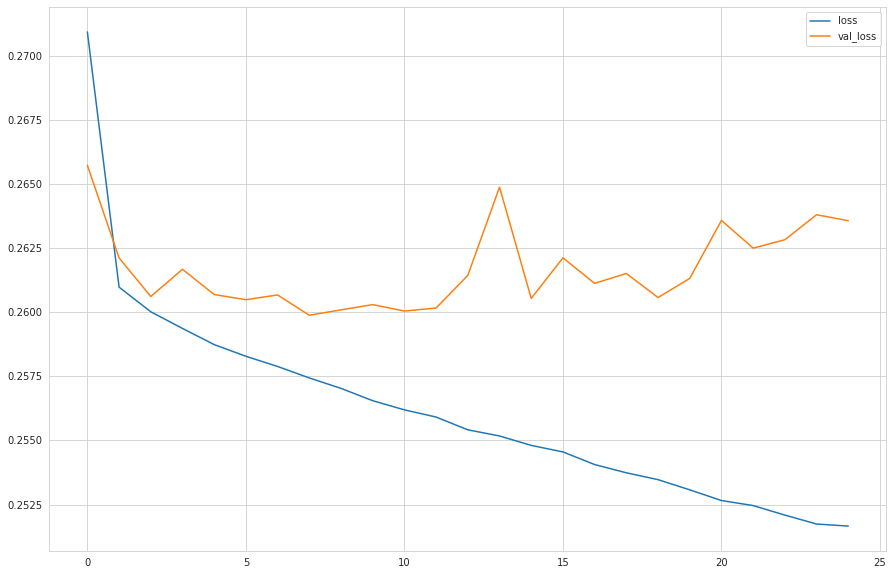

In [93]:
pd.DataFrame(model.history.history).plot(figsize=(15,10))
#There is huge distance between our model and validation data, so it means there is overfitting problem

In [94]:
predictions=model.predict_classes(X_test)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix


In [96]:
print(classification_report(y_test,predictions))
print("**************************")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     23277
           1       0.88      0.99      0.93     95289

    accuracy                           0.89    118566
   macro avg       0.91      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566

**************************
[[10629 12648]
 [  619 94670]]


The performance of the model is not good, so we will retrain our data and make new predictions

In [97]:
from tensorflow.keras.callbacks import EarlyStopping
#we will add early stopping which will work when the divergence between the training data and validation data happen

In [98]:
early_stop=EarlyStopping(monitor="val_loss",patience=10,verbose=1,mode="min")
#here we create our early stopping which will stop model after 10 number patience 

In [99]:
model2=Sequential()
model2.add(Dense(units=78, activation="relu"))
model2.add(Dropout(0.2)) # we can choose the precentage between 0 and 100, 0.5 represents %50 of the layer
model2.add(Dense(units=39, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(units=19,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(units=1,activation="sigmoid"))

In [100]:
model2.compile(loss="binary_crossentropy",optimizer="adam")

In [101]:
model2.fit(x=X_train,y=y_train,epochs=25, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2779 - val_loss: 0.2628
Epoch 2/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2636 - val_loss: 0.2632
Epoch 3/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2625 - val_loss: 0.2628
Epoch 4/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2618 - val_loss: 0.2607
Epoch 5/25
8646/8646 [==============================] - 13s 2ms/step - loss: 0.2613 - val_loss: 0.2615
Epoch 6/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2610 - val_loss: 0.2613
Epoch 7/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2608 - val_loss: 0.2610
Epoch 8/25
8646/8646 [==============================] - 13s 1ms/step - loss: 0.2604 - val_loss: 0.2601
Epoch 9/25
8646/8646 [==============================] - 13s 2ms/step - loss: 0.2603 - val_loss: 0.2603
Epoch 10/25
8646/8646 [==============================] - 13s 2ms/step - l

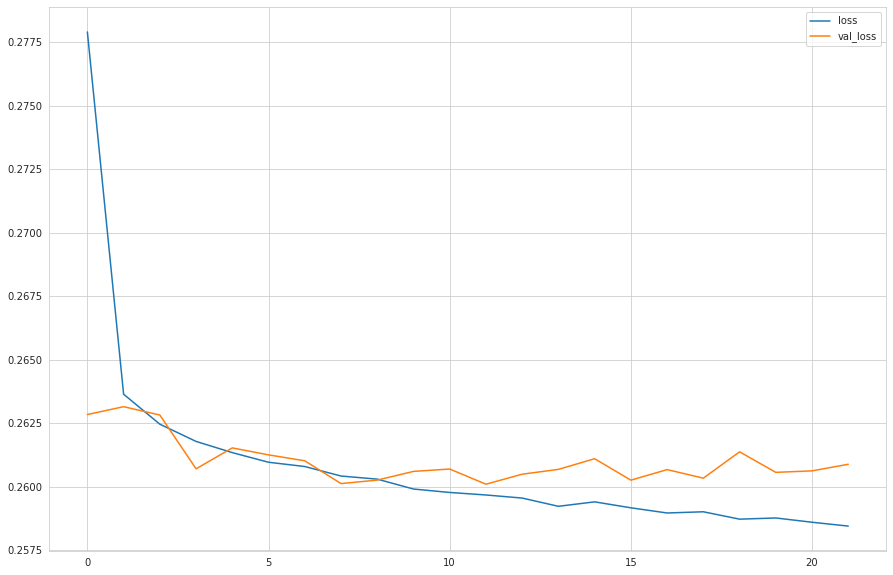

In [102]:
pd.DataFrame(model2.history.history).plot(figsize=(15,10))
#This plot is far better than previous one

In [103]:
predictions2=model2.predict_classes(X_test)

In [104]:
print(classification_report(y_test,predictions2))
print("**************************")
print(confusion_matrix(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     23277
           1       0.88      1.00      0.93     95289

    accuracy                           0.89    118566
   macro avg       0.94      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

**************************
[[10057 13220]
 [   69 95220]]


TP:10269, FP:13235, TN=94928, FN:134. This model is very good to predict the 0 class, but not as goog as in prediction of 1 class.Overall it is better than the previous one